In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [22]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100039 entries, 63829 to 85084
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 100039 non-null  int64  
 1   year                               100039 non-null  int64  
 2   loan_amount                        100039 non-null  int64  
 3   rate_of_interest                   100039 non-null  float64
 4   Interest_rate_spread               100039 non-null  float64
 5   Upfront_charges                    100039 non-null  float64
 6   property_value                     100039 non-null  float64
 7   income                             100039 non-null  float64
 8   Credit_Score                       100039 non-null  int64  
 9   LTV                                100039 non-null  float64
 10  dtir1                              100039 non-null  float64
 11  loan_limit_ncf                     100039

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [25]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy: ', accuracy_score(y_real, y_pred))
    print('Precision: ', precision_score(y_real, y_pred))
    print('Recall: ', recall_score(y_real, y_pred))
    print('F1: ', f1_score(y_real, y_pred))

In [26]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train:')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)

    print('Test:')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)
    
    return model

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtr_no_params = DecisionTreeClassifier(random_state=911)
dtr_no_params = build_model(dtr_no_params, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Test:
Confusion matrix: 
 [[31384   848]
 [  760  9882]]
Accuracy:  0.9624947520641881
Precision:  0.9209692451071761
Recall:  0.9285848524713399
F1:  0.9247613700168444


<Axes: >

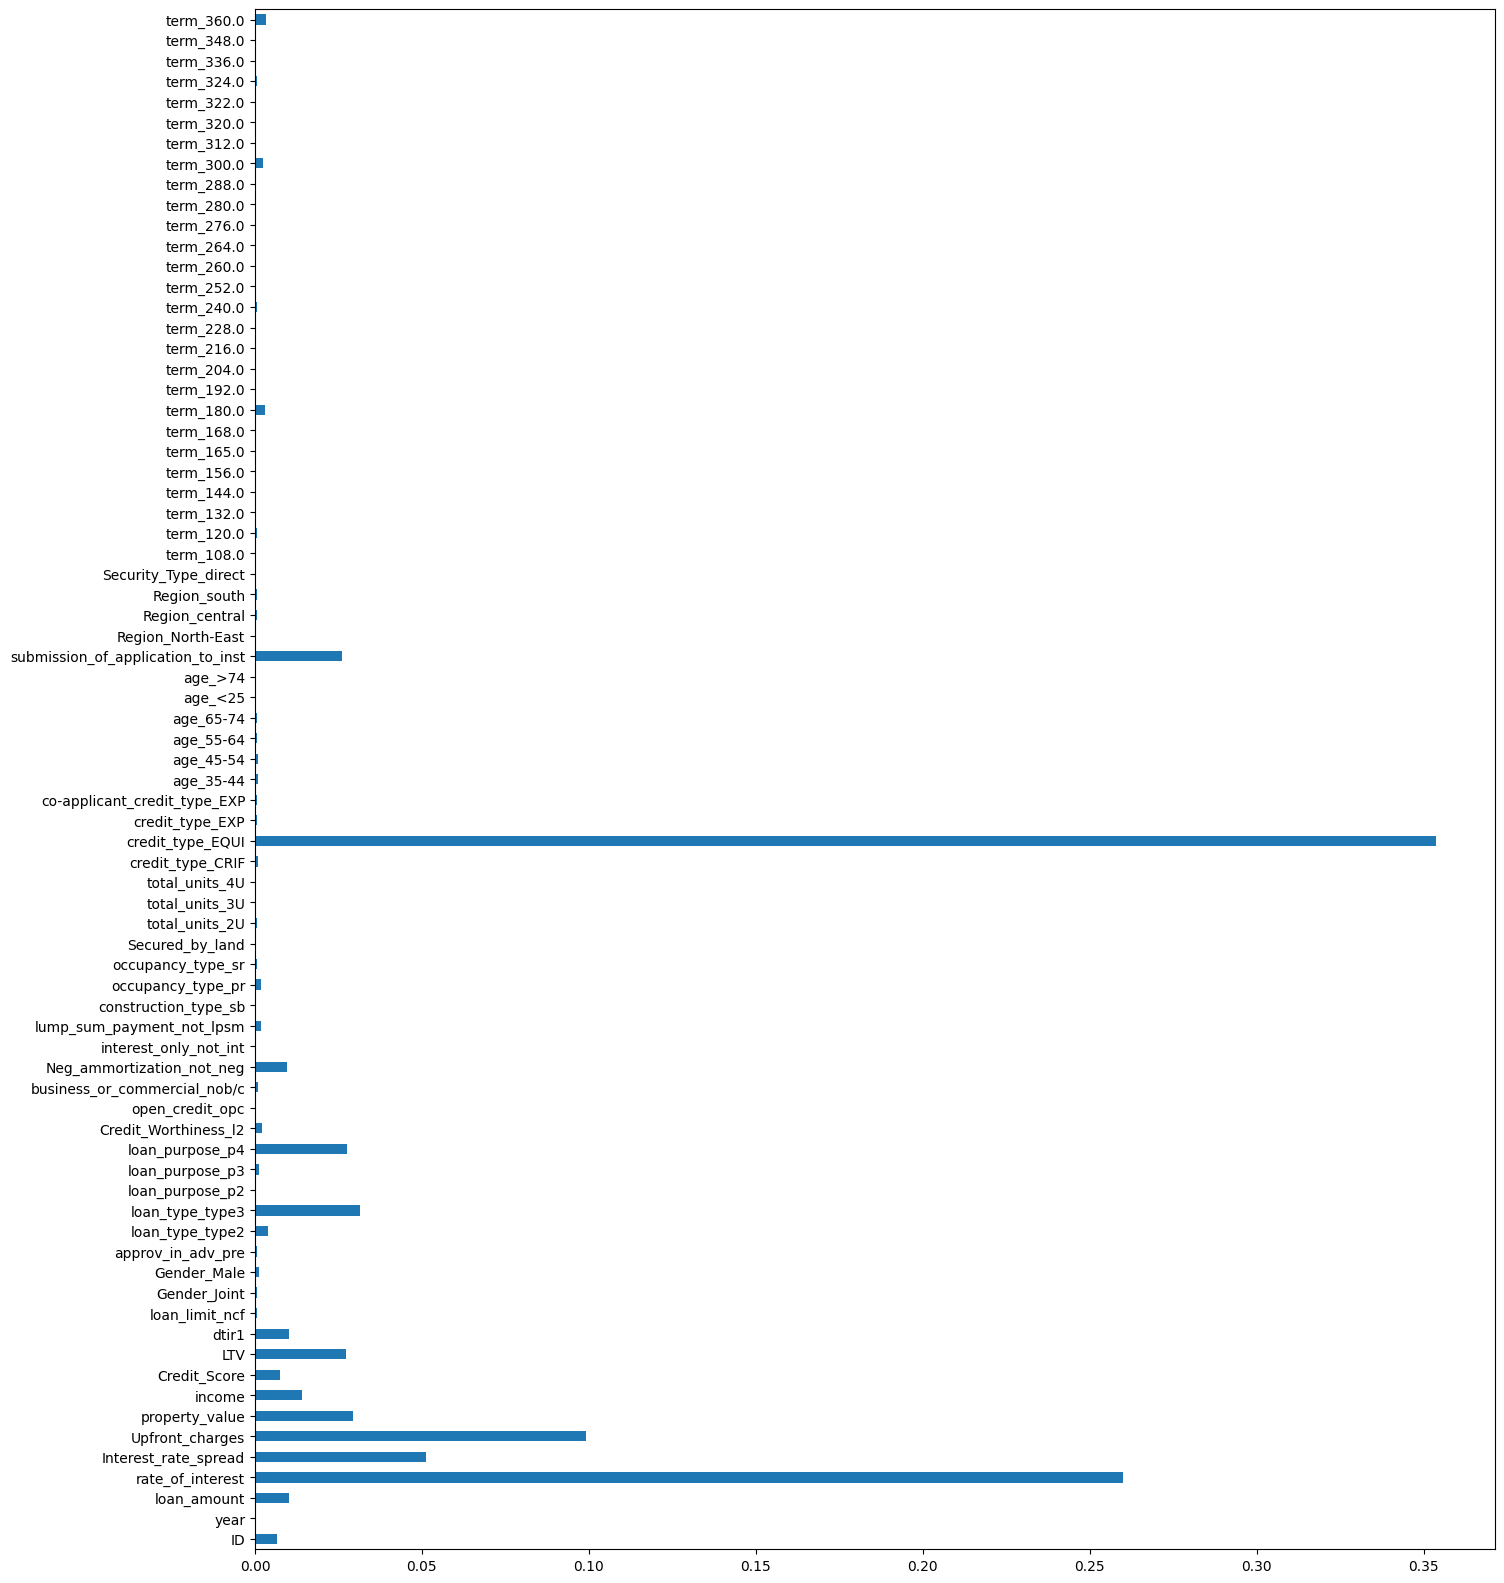

In [28]:
feat_importances = pd.Series(dtr_no_params.feature_importances_, index=X_train.columns)
feat_importances.plot(kind="barh",figsize=(16, 20))

In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
}

dtr_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=params, cv=5)

In [30]:
dtr_cv = build_model(dtr_cv, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Test:
Confusion matrix: 
 [[31554   678]
 [  692  9950]]
Accuracy:  0.9680459019452349
Precision:  0.936206247647723
Recall:  0.9349746288291675
F1:  0.9355900329102022


In [31]:
dtr_cv.best_params_

{'criterion': 'entropy', 'max_depth': 35}

In [32]:
dtr_cv.best_score_

0.9643539350391697

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc_no_params = RandomForestClassifier(random_state=0)
rfc_no_params = build_model(rfc_no_params, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Test:
Confusion matrix: 
 [[31983   249]
 [ 1592  9050]]
Accuracy:  0.9570602229789616
Precision:  0.9732229271964727
Recall:  0.8504040593873332
F1:  0.907677649064741


<Axes: >

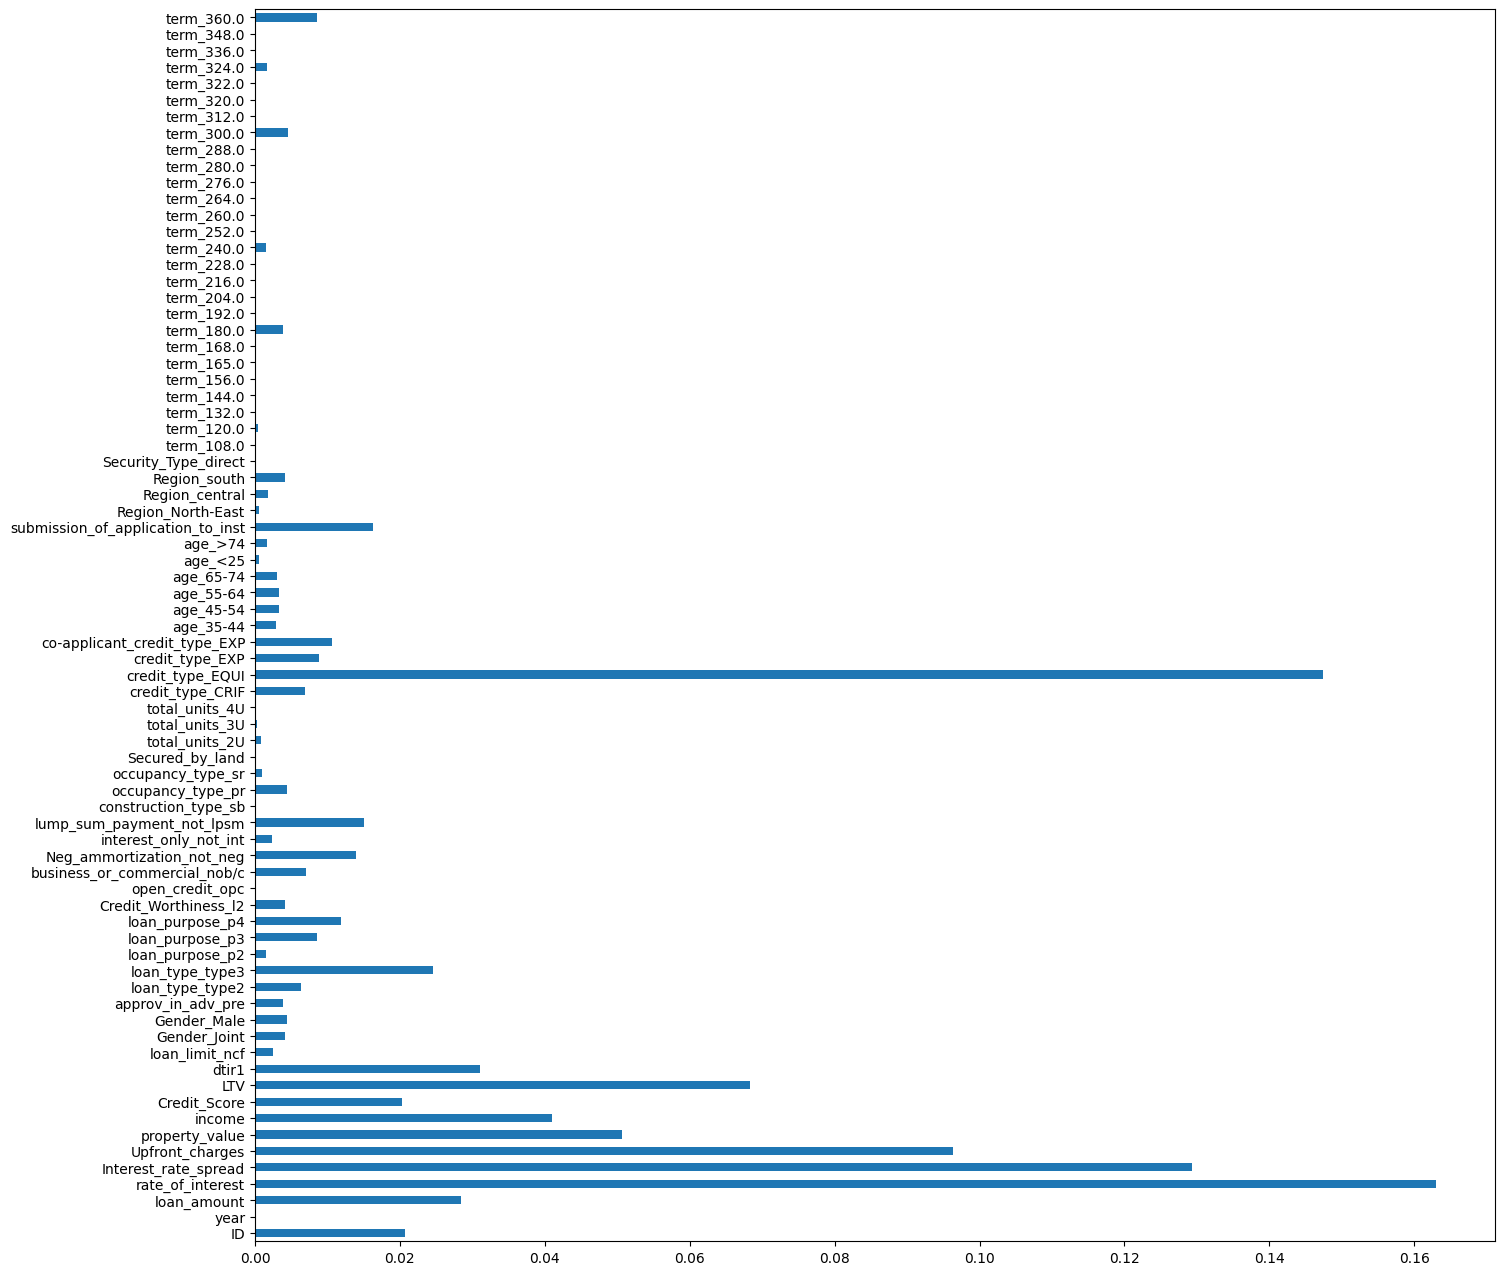

In [34]:
feat_importances = pd.Series(rfc_no_params.feature_importances_, index=X_train.columns)
feat_importances.plot(kind="barh",figsize=(16, 16))

In [35]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [250, 300, 350, 400]
}

rfc_cv = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params, cv=5)

In [36]:
rfc_cv = build_model(rfc_cv, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75208     0]
 [    0 24831]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Test:
Confusion matrix: 
 [[31992   240]
 [ 1526  9116]]
Accuracy:  0.9588095349162663
Precision:  0.9743480119709278
Recall:  0.856605901146401
F1:  0.9116911691169116


In [37]:
rfc_cv.best_params_

{'criterion': 'gini', 'n_estimators': 350}

In [38]:
rfc_cv.best_score_

0.9589160317279596

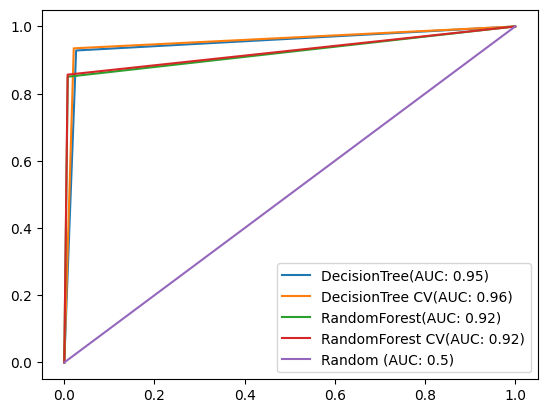

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtr_no_params, dtr_cv.best_estimator_, rfc_no_params, rfc_cv.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV',  'RandomForest', 'RandomForest CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.legend()
plt.show()

In [40]:
from joblib import dump
dump(models, 'trees.joblib')

['trees.joblib']